In [35]:
from datasets import load_dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [36]:
# Load all three dataset configurations (cache is cleared, so normal loading)
dataset_default = load_dataset("mpg-ranch/light-stable-semantics", "default", split='train')
dataset_dinov2 = load_dataset("mpg-ranch/light-stable-semantics", "dinov2_base", split='train')
dataset_dinov3 = load_dataset("mpg-ranch/light-stable-semantics", "dinov3_sat", split='train')

# Get the same sample across all configs (they have matching idx values)
sample_idx = 300
obs_default = dataset_default[sample_idx]
obs_dinov2 = dataset_dinov2[sample_idx] 
obs_dinov3 = dataset_dinov3[sample_idx]

print(f"Sample idx: {obs_default['idx']}")
print(f"All configs have same idx: {obs_default['idx'] == obs_dinov2['idx'] == obs_dinov3['idx']}")
print()
print("Default config features:", list(obs_default.keys()))
print("DINOv2 config features:", list(obs_dinov2.keys()))
print("DINOv3 config features:", list(obs_dinov3.keys()))

Sample idx: 22_19
All configs have same idx: True

Default config features: ['idx', 'image_t0', 'image_t1', 'image_t2', 'canopy_height']
DINOv2 config features: ['idx', 'cls_t0', 'cls_t1', 'cls_t2', 'patch_t0', 'patch_t1', 'patch_t2']
DINOv3 config features: ['idx', 'cls_t0', 'cls_t1', 'cls_t2', 'patch_t0', 'patch_t1', 'patch_t2']


In [37]:
# Show embedding shapes
print("=== DINOv2 Base (ViT-B/14) ===")
print(f"CLS token shape: {np.array(obs_dinov2['cls_t0']).shape}")
print(f"Patch tokens shape: {np.array(obs_dinov2['patch_t0']).shape}")
print(f"Patch grid: 16×16 = 256 patches")
print()

print("=== DINOv3 Large (ViT-L/16) ===")
print(f"CLS token shape: {np.array(obs_dinov3['cls_t0']).shape}")
print(f"Patch tokens shape: {np.array(obs_dinov3['patch_t0']).shape}")
print(f"Patch grid: 14×14 = 196 patches")

=== DINOv2 Base (ViT-B/14) ===
CLS token shape: (768,)
Patch tokens shape: (256, 768)
Patch grid: 16×16 = 256 patches

=== DINOv3 Large (ViT-L/16) ===
CLS token shape: (1024,)
Patch tokens shape: (196, 1024)
Patch grid: 14×14 = 196 patches


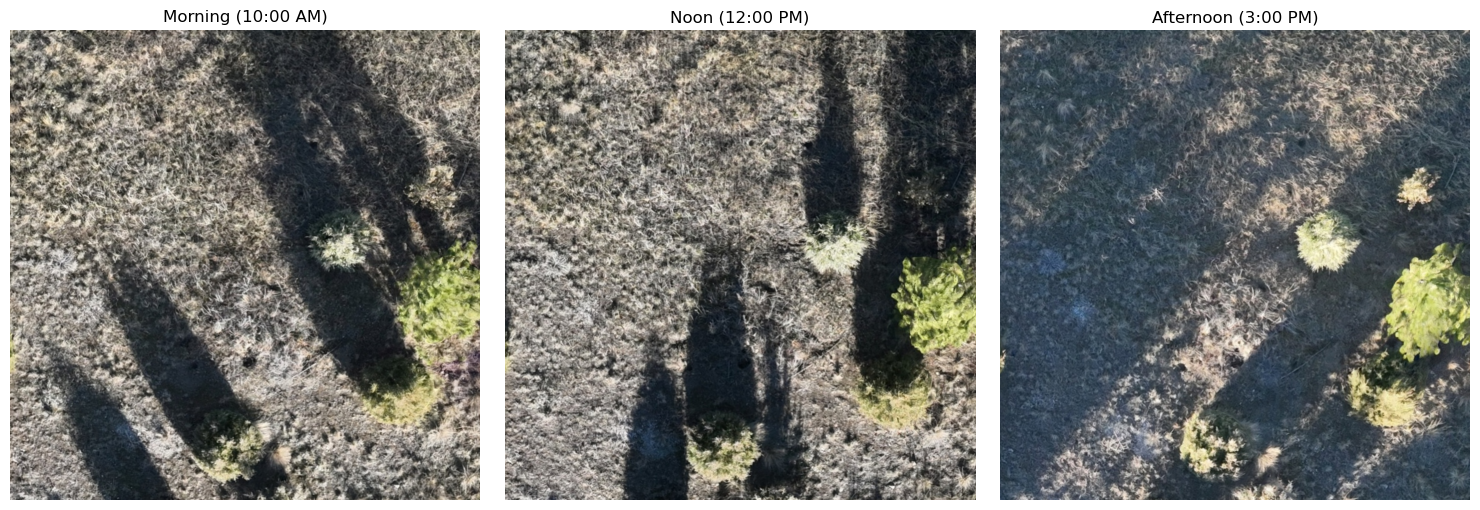

In [38]:
# Visualize RGB images at three time points
image_time_points = ['image_t0', 'image_t1', 'image_t2']
images = [obs_default[i] for i in image_time_points]
times = ['Morning (10:00 AM)', 'Noon (12:00 PM)', 'Afternoon (3:00 PM)']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, (ax, image, time) in enumerate(zip(axes, images, times)):
    ax.imshow(image)
    ax.set_title(time, fontsize=12)
    ax.axis('off')

plt.tight_layout()
plt.show()

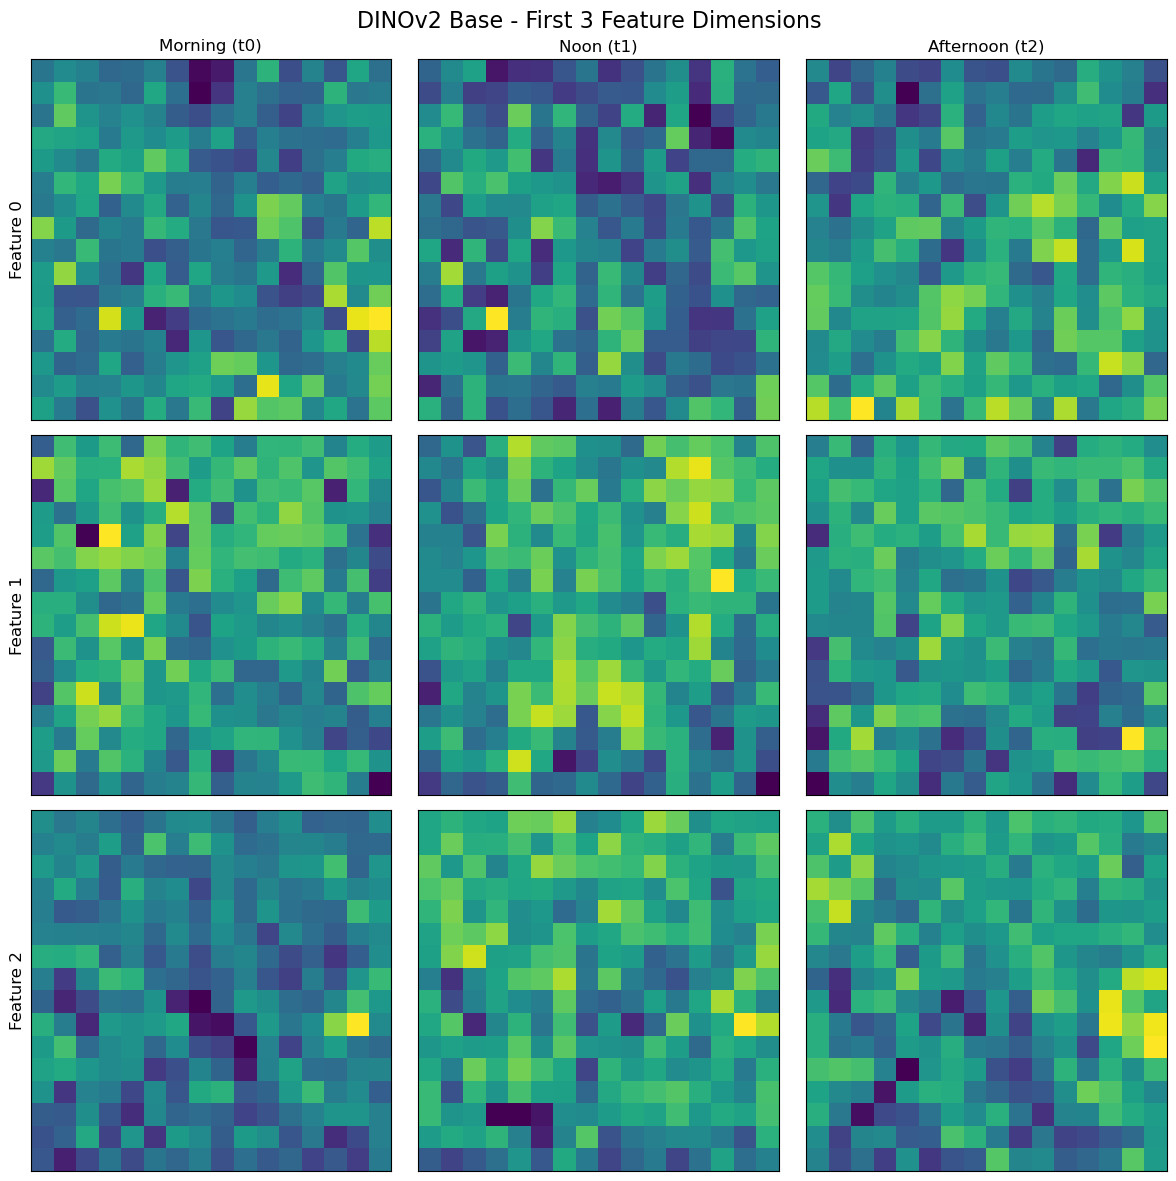

In [39]:
# Visualize DINOv2 patch features (16x16 grid)
patch_t0_v2 = np.array(obs_dinov2['patch_t0']).reshape(16, 16, 768, order='C')
patch_t1_v2 = np.array(obs_dinov2['patch_t1']).reshape(16, 16, 768, order='C') 
patch_t2_v2 = np.array(obs_dinov2['patch_t2']).reshape(16, 16, 768, order='C')

fig, axes = plt.subplots(3, 3, figsize=(12, 12))
fig.suptitle('DINOv2 Base - First 3 Feature Dimensions', fontsize=16)

patches_v2 = [patch_t0_v2, patch_t1_v2, patch_t2_v2]
times = ['Morning (t0)', 'Noon (t1)', 'Afternoon (t2)']

for feature_idx in range(3):  # First 3 features
    for time_idx, (patch, time_label) in enumerate(zip(patches_v2, times)):
        ax = axes[feature_idx, time_idx]
        
        # Extract the feature map for this feature dimension
        feature_map = patch[:, :, feature_idx]
        
        # Display with viridis colormap
        im = ax.imshow(feature_map, cmap='viridis', aspect='equal')
        
        # Add labels
        if feature_idx == 0:
            ax.set_title(time_label, fontsize=12)
        if time_idx == 0:
            ax.set_ylabel(f'Feature {feature_idx}', fontsize=12)
        
        ax.set_xticks([])
        ax.set_yticks([])

plt.tight_layout()
plt.show()

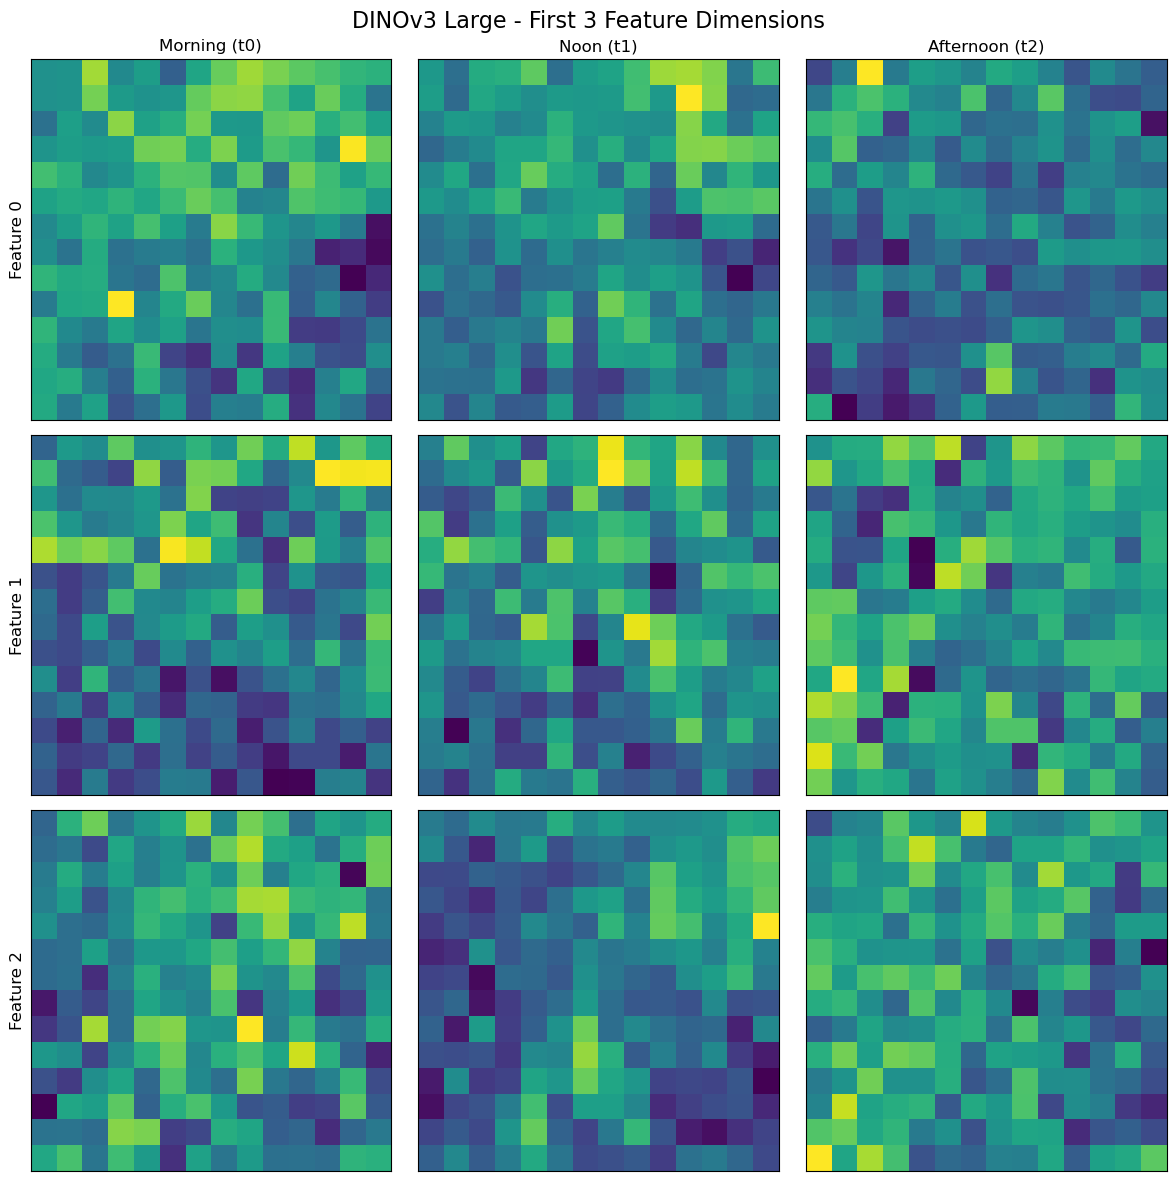

In [40]:
# Visualize DINOv3 patch features (14x14 grid)
patch_t0_v3 = np.array(obs_dinov3['patch_t0']).reshape(14, 14, 1024, order='C')
patch_t1_v3 = np.array(obs_dinov3['patch_t1']).reshape(14, 14, 1024, order='C') 
patch_t2_v3 = np.array(obs_dinov3['patch_t2']).reshape(14, 14, 1024, order='C')

fig, axes = plt.subplots(3, 3, figsize=(12, 12))
fig.suptitle('DINOv3 Large - First 3 Feature Dimensions', fontsize=16)

patches_v3 = [patch_t0_v3, patch_t1_v3, patch_t2_v3]
times = ['Morning (t0)', 'Noon (t1)', 'Afternoon (t2)']

for feature_idx in range(3):  # First 3 features
    for time_idx, (patch, time_label) in enumerate(zip(patches_v3, times)):
        ax = axes[feature_idx, time_idx]
        
        # Extract the feature map for this feature dimension
        feature_map = patch[:, :, feature_idx]
        
        # Display with viridis colormap
        im = ax.imshow(feature_map, cmap='viridis', aspect='equal')
        
        # Add labels
        if feature_idx == 0:
            ax.set_title(time_label, fontsize=12)
        if time_idx == 0:
            ax.set_ylabel(f'Feature {feature_idx}', fontsize=12)
        
        ax.set_xticks([])
        ax.set_yticks([])

plt.tight_layout()
plt.show()

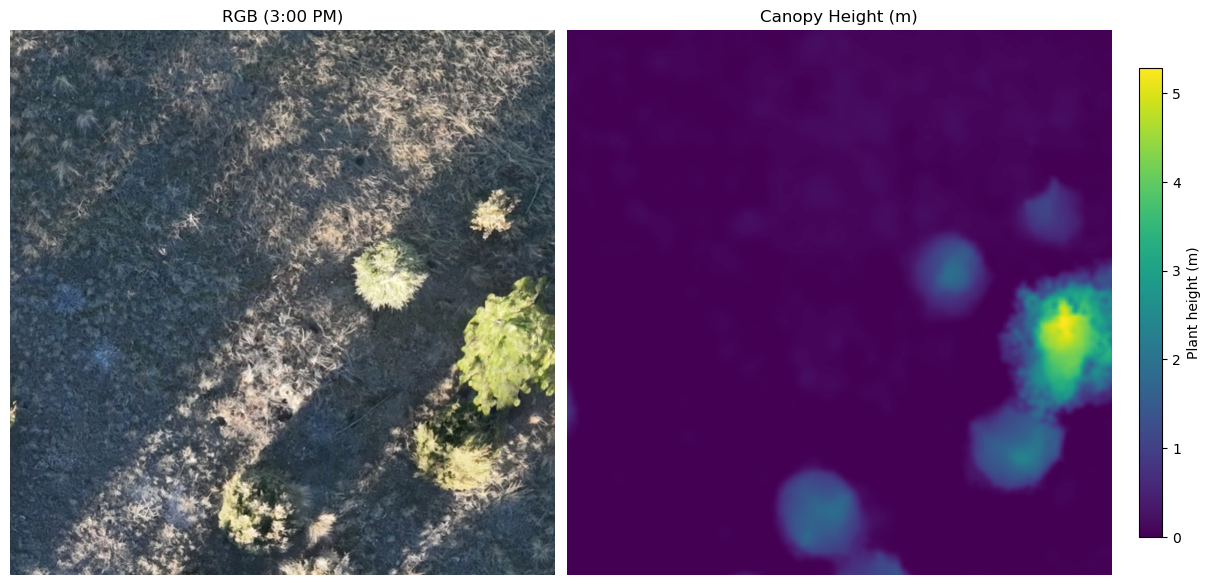

In [41]:
# Visualize RGB and Canopy Height from default config
rgb_t2 = np.array(obs_default['image_t2'])
chm = np.array(obs_default['canopy_height'], dtype=np.float32) / 100  # Convert cm to meters

height, width = rgb_t2.shape[:2]
extent = [0, width, height, 0]

# Create figure with constrained layout to handle colorbar properly
fig, axes = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)

# RGB plot
axes[0].imshow(rgb_t2, extent=extent)
axes[0].set_title('RGB (3:00 PM)')
axes[0].set_aspect('equal')
axes[0].axis('off')

# CHM plot
cmap = plt.cm.viridis.copy()
cmap.set_bad('white', alpha=0.0)
im_chm = axes[1].imshow(chm, cmap=cmap, extent=extent, interpolation='nearest')
axes[1].set_title('Canopy Height (m)')
axes[1].set_aspect('equal')
axes[1].axis('off')

# Add colorbar without affecting subplot sizes
cbar = fig.colorbar(im_chm, ax=axes[1], shrink=0.8)
cbar.set_label('Plant height (m)')

plt.show()